# **Project: Football Data Analysis**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Loading The Data</a></li>
<li><a href="#wrangling">Wrangling The Data</a></li>
<li><a href="#eda">Exploring The Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

---

> This is an extensive dataset of football/soccer teams, players, leagues and matches played for the duration of 2008 to 2016. It is a dataset suited for machine learning but I am just performing exploratory data analysis with it. As a result, I will not be making use of a lot of the data from this dataset.
> 
> After studying the tables, I have come up with some questions that I plan to explore:
> 
> 1. Throughout the time peroid, what teams had the highest number of wins, losses, and goals?
> 2. How did the teams improve over the years?
> 3. Do faster players have better finishing?

<a id='load'></a>
# **Loading The Data**

---


### Importing all modules and packages that will be used


In [69]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
from sqlalchemy import create_engine

import pprint

%matplotlib inline

### Connecting to the SQLite database


In [70]:
# This code connects to the database through sqlite3
# This enables the database to be queried with traditional SQL code
load = sqlite3.connect('database.sqlite')
cursor = load.cursor()

# This code connects to the database through sqlalchemy
# This enables the database tables to be stored in a pandas dataframe and analyzed with python code and packages
engine = create_engine('sqlite:///database.sqlite')


### Listing all tables in the database


In [71]:
# This code checks the database to list all tables inside
cursor.execute('SELECT name from sqlite_master where type= "table"')
pprint.pprint(cursor.fetchall())


[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]


> Even though the above list contains 8 tables, there are actually 7 tables in the database. The first table `sqlite_sequence` is automatically generated by [SQLite](https://www.sqlite.org/autoinc.html#:~:text=The%20sqlite_sequence%20table%20is%20created,%2C%20INSERT%2C%20and%20DELETE%20statements.) to keep track of the other tables.


### Creating dataframes for each of the 7 tables


In [72]:
df_league = pd.read_sql_table("League", engine)
df_player = pd.read_sql_table("Player", engine)
df_match = pd.read_sql_table("Match", engine)
df_country = pd.read_sql_table("Country", engine)
df_team = pd.read_sql_table("Team", engine)
df_team_attr = pd.read_sql_table("Team_Attributes", engine)
df_player_attr = pd.read_sql_table("Player_Attributes", engine)

cursor.close()


> From this point on, I try to run my analysis in both Python and SQL code but mainly Python.


<a id='wrangling'></a>
# **Wrangling The Data**

---


## **A. `Match` Table**


In [73]:
df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Removing Columns

> The `Match` table is very large and contains many columns which I would not need for my current analysis (especially the betting odds columns), some columns are missing all their values and some columns are not explained in the documentation so I don't know what they represent. I drop all irrelevant columns.
>
> I will be removing:
>
> 1. all columns that have **player** in their name, because I do not know what those numbers represent and it is not explained on the documentation
> 2. all the betting odds columns at the right side of the table, because I am not using them for my analysis
> 3. all the match statistics colummns (except the goals scored), because the values are not available in the dataset, they are all missing


In [74]:
# Listing all column names in the `match` table so I can know the index of the columns to be deleted
list(enumerate(df_match.columns, start=0))

[(0, 'id'),
 (1, 'country_id'),
 (2, 'league_id'),
 (3, 'season'),
 (4, 'stage'),
 (5, 'date'),
 (6, 'match_api_id'),
 (7, 'home_team_api_id'),
 (8, 'away_team_api_id'),
 (9, 'home_team_goal'),
 (10, 'away_team_goal'),
 (11, 'home_player_X1'),
 (12, 'home_player_X2'),
 (13, 'home_player_X3'),
 (14, 'home_player_X4'),
 (15, 'home_player_X5'),
 (16, 'home_player_X6'),
 (17, 'home_player_X7'),
 (18, 'home_player_X8'),
 (19, 'home_player_X9'),
 (20, 'home_player_X10'),
 (21, 'home_player_X11'),
 (22, 'away_player_X1'),
 (23, 'away_player_X2'),
 (24, 'away_player_X3'),
 (25, 'away_player_X4'),
 (26, 'away_player_X5'),
 (27, 'away_player_X6'),
 (28, 'away_player_X7'),
 (29, 'away_player_X8'),
 (30, 'away_player_X9'),
 (31, 'away_player_X10'),
 (32, 'away_player_X11'),
 (33, 'home_player_Y1'),
 (34, 'home_player_Y2'),
 (35, 'home_player_Y3'),
 (36, 'home_player_Y4'),
 (37, 'home_player_Y5'),
 (38, 'home_player_Y6'),
 (39, 'home_player_Y7'),
 (40, 'home_player_Y8'),
 (41, 'home_player_Y9'),
 (

In [75]:
# Creating a function to store all columns that will be removed from the Match table
def match_columns_to_delete():
    # Storing the table columns in a variable
    match_columns = df_match.columns

    # Confirming changes
    return match_columns[11:]


In [76]:
# Dropping unwanted columns
df_match.drop(columns=match_columns_to_delete(), inplace=True)


In [77]:
# Confirming changes
df_match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


### Adding Columns For Match Points
> In a football league match, the winning team gets 3 points, the losing team gets 0 points and if there is a draw, both teams get 1 point each.
> 
> I will be adding a column for home team and a column for away team, to record the points.

In [78]:
# Creating a list of conditions for the 3 possible outcomes of a match
conditions = [
    (df_match['home_team_goal'] > df_match['away_team_goal']),
    (df_match['home_team_goal'] < df_match['away_team_goal']),
    (df_match['home_team_goal'] == df_match['away_team_goal'])
]


In [79]:
# Points to be assigned to the home team based on the conditions above, in the following order
home_points = [3, 0, 1]

# Creating the home column
df_match['home_points'] = np.select(conditions, home_points)

# Confirming changes
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_points
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0


In [80]:
# Points to be assigned to the away team based on the conditions, in the following order
away_points = [0, 3, 1]

# Creating the away column
df_match['away_points'] = np.select(conditions, away_points)

# Confirming changes
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_points,away_points
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3


### Reorganizing The Table
> Here I will be making the following changes:
> 1. Join the `team_api_id` from 2 columns to one column. 
> 2. Join `team_goals` from 2 columns to one column
> 3. Join the `team_goal` from 2 columns to one column
> 4. Join the `points` from 2 columns to one column
>
>I will achieve this by making 2 seperate tables, one for home and one for away. Then joining the tables at the end.

In [81]:
# Creating a function to store the dataframe of only home matches
def home_matches():
    # Creating a table for home team by dropping away team columns
    df_match_h = df_match.drop(columns=['away_team_api_id', 'away_team_goal', 'away_points'])

    # Adding a column to specifty these are home matches
    df_match_h['side'] = 'home'

    # Renaming the columns since I've seperated the home and away matches
    df_match_h.rename(columns={'home_team_api_id':'team_api_id', 'home_team_goal':'team_goal', 'home_points':'points'}, inplace = True)

    return df_match_h

# Confirming changes
home_matches().head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home


In [82]:
# Creating a function to store the dataframe of only away matches
def away_matches():
    # Creating a table for away team by dropping home team columns
    df_match_a = df_match.drop(columns=['home_team_api_id', 'home_team_goal', 'home_points'])

    # Adding a column to specifty these are away matches
    df_match_a['side'] = 'away'

    # Renaming the columns since I've seperated the home and away matches
    df_match_a.rename(columns={'away_team_api_id':'team_api_id', 'away_team_goal':'team_goal', 'away_points':'points'}, inplace = True)

    return df_match_a

# Confirming changes
away_matches().head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9993,1,1,away
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,9994,0,1,away
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,8635,3,3,away
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9998,0,0,away
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,9985,3,3,away


### Joining the tables

In [83]:
# Joining the 2 tables and storing the dataframe in a new table so that the original table is still there for reference purposes
df_match_ed = pd.concat([home_matches(), away_matches()])

# Confirming changes
df_match_ed.head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home


### Adding Column for Win, Loss or Draw
> Now that I've unpovited the table to a single column for goals and a single column for points, I will be adding a single column to signify weather the team won, lost or drew the match. This can be computed from the information in the `points` column.

In [84]:
conditions = [
    (df_match_ed['points'] == 3),
    (df_match_ed['points'] == 0),
    (df_match_ed['points'] == 1)
]

In [85]:
# Points to be assigned to the home team based on the conditions above, in the following order
result = ['win', 'loss', 'draw']

# Creating the home column
df_match_ed['result'] = np.select(conditions, result)

# Confirming changes
df_match_ed.head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side,result
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home,draw
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home,draw
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home,loss
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home,win
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home,loss


### Adding Columns
> Here I will be making changes to the table by doing the following:
> 1. Adding the country names by referencing the country table
> 2. Adding the league names by referencing the league table
> 3. Adding the team names by referencnig the team table
> 
> Lets take start with the Country table

In [86]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


> The `id` column is the foreign key I will be using to get the country names that will be inserted to the match table so I will need to change the `id` column name to match with the `country_id` column in the edited match table so that they have the same column name

In [87]:
# Renaming the columns
df_country.rename(columns={'id':'country_id', 'name':'country'}, inplace=True)

# Confirming changes
df_country

,country_id,country
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [88]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_country, on='country_id', how='left')

# Confirming changes
df_match_ed.head()

,id,country_id,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side,result,country
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home,draw,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home,draw,Belgium
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home,loss,Belgium
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home,win,Belgium
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home,loss,Belgium


> Next I check the league table

In [89]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


> Again the `id` column is the foreign key I will be using to get the league names that will be inserted to the match table so I will need to change the `id` column name to match with the `league_id` column in the edited match table so that they have the same column name

In [90]:
# Renaming the columns
df_league.rename(columns={'id':'league_id', 'name':'league'}, inplace=True)

# Confirming changes
df_league

,league_id,country_id,league
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [91]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_league, on='league_id', how='left')

# Confirming changes
df_match_ed.head()

,id,country_id_x,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side,result,country,country_id_y,league
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home,draw,Belgium,1,Belgium Jupiler League
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home,draw,Belgium,1,Belgium Jupiler League
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home,loss,Belgium,1,Belgium Jupiler League
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home,win,Belgium,1,Belgium Jupiler League
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home,loss,Belgium,1,Belgium Jupiler League


> Some extra columns were created because the match table and the league table both have a column for `country_id` but that will not be a problem as I will be dropping those columns soon.
>
> Now lets check the team table.

In [92]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


> Here the foreign key `team_api_id` is the same as the Match table so I'll only be changing the **team name** column. I will be working with the team's long name (not the short name).

In [93]:
# Renaming the columns
df_team.rename(columns={'team_long_name':'team'}, inplace=True)

# Confirming changes
df_team.head(2)

,id,team_api_id,team_fifa_api_id,team,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [94]:
# Merging the tables using a left-join
df_match_ed = pd.merge(df_match_ed, df_team, on='team_api_id', how='left')

# Confirming changes
df_match_ed.head()

,id_x,country_id_x,league_id,season,stage,date,match_api_id,team_api_id,team_goal,points,side,result,country,country_id_y,league,id_y,team_fifa_api_id,team,team_short_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,1,1,home,draw,Belgium,1,Belgium Jupiler League,1,673.0,KRC Genk,GEN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,0,1,home,draw,Belgium,1,Belgium Jupiler League,3,15005.0,SV Zulte-Waregem,ZUL
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,0,0,home,loss,Belgium,1,Belgium Jupiler League,5,1750.0,KSV Cercle Brugge,CEB
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,5,3,home,win,Belgium,1,Belgium Jupiler League,7,674.0,KAA Gent,GEN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,1,0,home,loss,Belgium,1,Belgium Jupiler League,9,NaN,FCV Dender EH,DEN


> The tables have been merged and it has joined all the columns from the other tables as well. Now I will be dropping all unwanted columns.

In [95]:
# Dropping the columns
df_match_ed.drop(columns=['id_x', 'country_id_x', 'league_id', 'match_api_id', 'team_api_id', 'country_id_y', 'id_y', 'team_fifa_api_id', 'team_short_name'], inplace=True)

# Confirming changes
df_match_ed.head()

,season,stage,date,team_goal,points,side,result,country,league,team
0,2008/2009,1,2008-08-17 00:00:00,1,1,home,draw,Belgium,Belgium Jupiler League,KRC Genk
1,2008/2009,1,2008-08-16 00:00:00,0,1,home,draw,Belgium,Belgium Jupiler League,SV Zulte-Waregem
2,2008/2009,1,2008-08-16 00:00:00,0,0,home,loss,Belgium,Belgium Jupiler League,KSV Cercle Brugge
3,2008/2009,1,2008-08-17 00:00:00,5,3,home,win,Belgium,Belgium Jupiler League,KAA Gent
4,2008/2009,1,2008-08-16 00:00:00,1,0,home,loss,Belgium,Belgium Jupiler League,FCV Dender EH


### Check for duplicate rows

In [96]:
# Checking for duplicate rows
df_match_ed.duplicated().sum()

1

In [97]:
# Having a look at all the duplicates
df_match_ed[df_match_ed.duplicated(keep=False)]

,season,stage,date,team_goal,points,side,result,country,league,team
16409,2010/2011,6,2010-09-18 00:00:00,1,3,home,win,Poland,Poland Ekstraklasa,Polonia Bytom
16415,2010/2011,6,2010-09-18 00:00:00,1,3,home,win,Poland,Poland Ekstraklasa,Polonia Bytom


In [98]:
# Dropping duplicates since there are only 1
df_match_ed = df_match_ed.drop_duplicates()

# Confirming changes
df_match_ed.duplicated().sum()

0

### Check for null values

In [99]:
# Checking for null values
df_match_ed.isnull().sum()

season       0
stage        0
date         0
team_goal    0
points       0
side         0
result       0
country      0
league       0
team         0
dtype: int64

### Final check

In [100]:
df_match_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51957 entries, 0 to 51957
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     51957 non-null  object
 1   stage      51957 non-null  int64 
 2   date       51957 non-null  object
 3   team_goal  51957 non-null  int64 
 4   points     51957 non-null  int32 
 5   side       51957 non-null  object
 6   result     51957 non-null  object
 7   country    51957 non-null  object
 8   league     51957 non-null  object
 9   team       51957 non-null  object
dtypes: int32(1), int64(2), object(7)
memory usage: 4.2+ MB


## **B. `Player` Table**

In [101]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182,154


> I don't need the `player_fifa_api_id` column so I drop it

In [102]:
# Dropping column
df_player_ed = df_player.drop(columns=['player_fifa_api_id'])


In [103]:
# Confirming changes
df_player_ed.head()

,id,player_api_id,player_name,birthday,height,weight
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187
1,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170,146
2,3,162549,Aaron Doran,1991-05-13 00:00:00,170,163
3,4,30572,Aaron Galindo,1982-05-08 00:00:00,182,198
4,5,23780,Aaron Hughes,1979-11-08 00:00:00,182,154


> I would like to add player attributes to this table from the `player attributes` table so lets have a look at the table

In [104]:
df_player_attr.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


> There are many columns in this table that I will not be using for my analysis so I will be droopping them. I will only be choosing a few player attribures and dropping the rest. The attributes I will be keeping are: `overall_rating, preferred_foot, finishing, acceleration, sprint_speed and stamina`.

In [105]:
# Creating a function to store all columns that will be removed
def player_columns_to_remove():
    player_attr_columns = list(df_player_attr.columns)
    player_attr_columns_to_keep = ['player_api_id', 'date', 'overall_rating', 'preferred_foot', 'finishing', 'acceleration', 'sprint_speed', 'stamina']
    [player_attr_columns.remove(x) for x in player_attr_columns_to_keep]
    return player_attr_columns

In [106]:
# Dropping columns
df_player_attr.drop(columns=player_columns_to_remove(), inplace=True)

# Confirming changes
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_api_id   183978 non-null  int64  
 1   date            183978 non-null  object 
 2   overall_rating  183142 non-null  float64
 3   preferred_foot  183142 non-null  object 
 4   finishing       183142 non-null  float64
 5   acceleration    183142 non-null  float64
 6   sprint_speed    183142 non-null  float64
 7   stamina         183142 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 11.2+ MB


> Now we merge the `player` table with the `player_attr` table using the **player_api_key** foreign key

In [107]:
# Merging the tables
df_player_ed = pd.merge(df_player_ed, df_player_attr, on='player_api_id', how='inner')

# Confirming changes
df_player_ed.head()

,id,player_api_id,player_name,birthday,height,weight,date,overall_rating,preferred_foot,finishing,acceleration,sprint_speed,stamina
0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2016-02-18 00:00:00,67.0,right,44.0,60.0,64.0,54.0
1,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-11-19 00:00:00,67.0,right,44.0,60.0,64.0,54.0
2,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-09-21 00:00:00,62.0,right,44.0,60.0,64.0,54.0
3,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-03-20 00:00:00,61.0,right,43.0,60.0,64.0,54.0
4,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2007-02-22 00:00:00,61.0,right,43.0,60.0,64.0,54.0


In [108]:
# Dropping the id column
df_player_ed.drop(columns=['id', 'player_api_id'], inplace=True)

# Confirming changes
df_player_ed.head()

,player_name,birthday,height,weight,date,overall_rating,preferred_foot,finishing,acceleration,sprint_speed,stamina
0,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2016-02-18 00:00:00,67.0,right,44.0,60.0,64.0,54.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-11-19 00:00:00,67.0,right,44.0,60.0,64.0,54.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-09-21 00:00:00,62.0,right,44.0,60.0,64.0,54.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-03-20 00:00:00,61.0,right,43.0,60.0,64.0,54.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2007-02-22 00:00:00,61.0,right,43.0,60.0,64.0,54.0


### Checking for duplicate rows

In [109]:
df_player_ed.duplicated().sum()

1

In [110]:
# Dropping the duplicate
df_player_ed = df_player_ed.drop_duplicates()

# Confirming changes
df_player_ed.duplicated().sum()

0

### Dealing with null values

In [111]:
df_player_ed.isnull().sum()

player_name         0
birthday            0
height              0
weight              0
date                0
overall_rating    835
preferred_foot    835
finishing         835
acceleration      835
sprint_speed      835
stamina           835
dtype: int64

> There are 835 rows that contain null values for the player stats so I will drop them.

In [112]:
df_player_ed = df_player_ed.dropna()
df_player_ed.isnull().sum()

player_name       0
birthday          0
height            0
weight            0
date              0
overall_rating    0
preferred_foot    0
finishing         0
acceleration      0
sprint_speed      0
stamina           0
dtype: int64

### Final check

In [113]:
df_player_ed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   player_name     183142 non-null  object 
 1   birthday        183142 non-null  object 
 2   height          183142 non-null  int64  
 3   weight          183142 non-null  int64  
 4   date            183142 non-null  object 
 5   overall_rating  183142 non-null  float64
 6   preferred_foot  183142 non-null  object 
 7   finishing       183142 non-null  float64
 8   acceleration    183142 non-null  float64
 9   sprint_speed    183142 non-null  float64
 10  stamina         183142 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 16.8+ MB


<a id='eda'></a>
# **Exploring The Data**

---


> Now we start exploring the questions

## 1. Throughout the time peroid, what teams had the highest number of wins, losses, and goals?

> For this analysis, I will only be analyzing 10 teams from the dataset. I will be looking at the top 10 teams with the most wins over the time period.

### **Matches Won**

In [114]:
df_match_ed

,season,stage,date,team_goal,points,side,result,country,league,team
0,2008/2009,1,2008-08-17 00:00:00,1,1,home,draw,Belgium,Belgium Jupiler League,KRC Genk
1,2008/2009,1,2008-08-16 00:00:00,0,1,home,draw,Belgium,Belgium Jupiler League,SV Zulte-Waregem
2,2008/2009,1,2008-08-16 00:00:00,0,0,home,loss,Belgium,Belgium Jupiler League,KSV Cercle Brugge
3,2008/2009,1,2008-08-17 00:00:00,5,3,home,win,Belgium,Belgium Jupiler League,KAA Gent
4,2008/2009,1,2008-08-16 00:00:00,1,0,home,loss,Belgium,Belgium Jupiler League,FCV Dender EH
...,...,...,...,...,...,...,...,...,...,...
51953,2015/2016,9,2015-09-22 00:00:00,0,0,away,loss,Switzerland,Switzerland Super League,FC Thun
51954,2015/2016,9,2015-09-23 00:00:00,2,3,away,win,Switzerland,Switzerland Super League,FC Luzern
51955,2015/2016,9,2015-09-23 00:00:00,0,0,away,loss,Switzerland,Switzerland Super League,FC Sion
51956,2015/2016,9,2015-09-22 00:00:00,0,1,away,draw,Switzerland,Switzerland Super League,FC Zürich


> I am going to perform aggregations on the table and I do not want the `stage` column to be aggregated by the **group_by** function so I will convert the `stage` column type to string.

In [115]:
# Changing the column type to a string
df_match_ed = df_match_ed.astype({'stage':'str'})

# Confirming changes
df_match_ed.dtypes

season       object
stage        object
date         object
team_goal     int64
points        int32
side         object
result       object
country      object
league       object
team         object
dtype: object

In [116]:
# Creating a table for only matches that were won
top_ten_wins = df_match_ed[df_match_ed.result == 'win']
top_ten_wins['result'].value_counts()


win    19382
Name: result, dtype: int64

In [117]:
# Grouping the table by the number of matches won by each team, then sorting in descending order and returning the top 10
top_ten_wins = top_ten_wins.groupby(['team'], as_index=False)['result'].count().sort_values(by='result', ascending=False).head(10)
top_ten_wins

,team,result
75,FC Barcelona,234
211,Real Madrid CF,228
49,Celtic,218
77,FC Bayern Munich,193
162,Manchester United,192
133,Juventus,189
232,SL Benfica,185
89,FC Porto,183
15,Ajax,181
76,FC Basel,180


In [118]:
# plt.bar(top_ten_wins['team'], top_ten_wins['result'])
# plt.xlabel('Total Wins from 2008-2015')
# plt.ylabel('Clubs')
# plt.legend('Matches won')

rcParams['font.size'] = 14
rcParams['figure.figsize'] = [15, 8]

o:\Anaconda\Anaconda3\envs\py310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


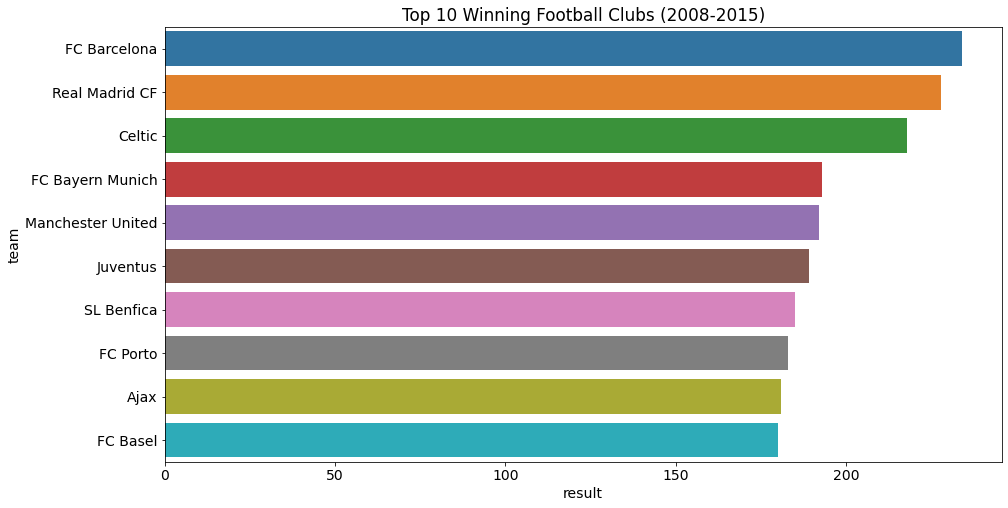

In [119]:
plt.title('Top 10 Winning Football Clubs (2008-2015)')
sns.barplot('result', 'team', data=top_ten_wins);


> It can be seen from the above chart that, the team with the highest number of wins in the time peroid is spanish giant **FC Barcelona**, followed by another spanish giant **Real Madrid CF**.

### **Matches Lost**
> Now lets take a look at the teams with the most losses during the time period

In [120]:
# Filtering the table to return only matches that were lost
top_ten_loss = df_match_ed[df_match_ed.result == 'loss']
top_ten_loss['result'].value_counts()


loss    19383
Name: result, dtype: int64

In [121]:
# Grouping the table by the number of matches lost by each team, then sorting in descending order and returning the top 10
top_ten_loss = top_ten_loss.groupby(['team'], as_index=False)['result'].count().sort_values(by='result', ascending=False).head(10)
top_ten_loss

,team,result
144,Kilmarnock,142
112,Getafe CF,139
202,RCD Espanyol,134
256,Sunderland,134
250,St. Mirren,131
20,Aston Villa,130
52,Chievo Verona,129
281,Vitória Setúbal,125
122,Hannover 96,124
168,Málaga CF,120


o:\Anaconda\Anaconda3\envs\py310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


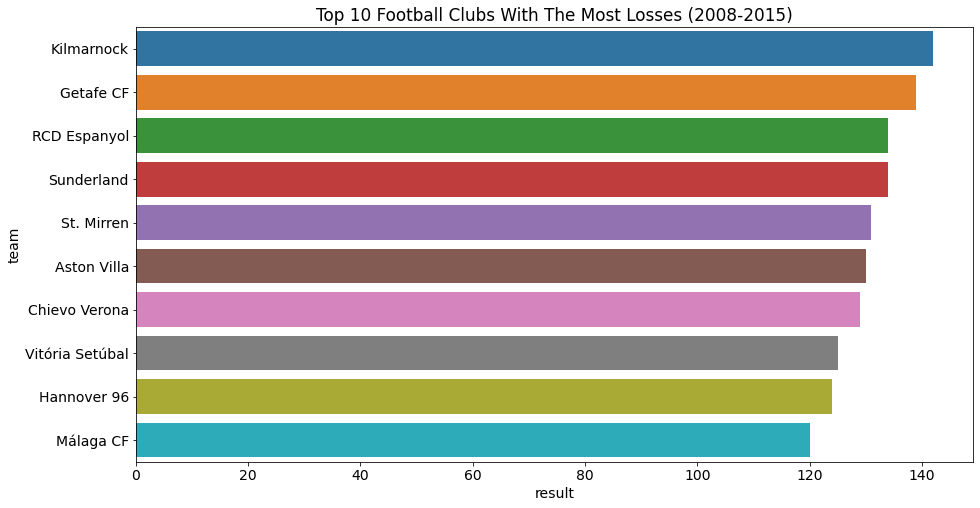

In [122]:
plt.title('Top 10 Football Clubs With The Most Losses (2008-2015)')
sns.barplot('result', 'team', data=top_ten_loss);

> Here it can be seen that the Scottish Football Club **Kilmarnock** is the team with the most losses during the period of the dataset.

### **Goals Scored**
> Now we will take a look at the clubs that had the highest number of goals throughout the time period.

In [123]:
# Grouping the table by the number of goals scored by each team, then sorting in descending order and returning the top 10
top_goals = df_match_ed.groupby(['team'], as_index=False)['team_goal'].sum().sort_values(by='team_goal', ascending=False).head(10)
top_goals

,team,team_goal
75,FC Barcelona,849
211,Real Madrid CF,843
49,Celtic,695
77,FC Bayern Munich,653
184,PSV,652
15,Ajax,647
76,FC Basel,619
161,Manchester City,606
51,Chelsea,583
162,Manchester United,582


o:\Anaconda\Anaconda3\envs\py310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


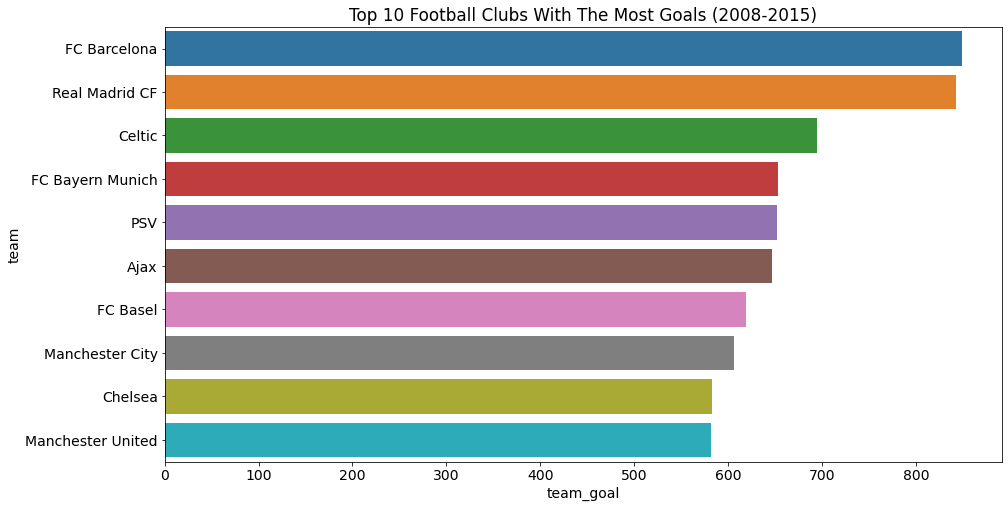

In [124]:
plt.title('Top 10 Football Clubs With The Most Goals (2008-2015)')
sns.barplot('team_goal', 'team', data=top_goals);

> We can see a similar result to the top wins chart. Barcelona, Real Madrid, Celtic and FC Bayern maintain their position. We can also see that Real and Barca have much higher margin of goals than the rest of the teams.

## 2. How did the teams improve over the years?

> For this analysis, I will only be working with the top team from the last question, FC Barcelona. I will be comparing the goals scored and matches won by the club and how that changes each season.

### **FC Barcelona**

In [125]:
# Filtering the table for only Barcelona matches
barca = df_match_ed[df_match_ed.team == 'FC Barcelona']
barca['team'].value_counts()

barca

,season,stage,date,team_goal,points,side,result,country,league,team
21534,2008/2009,10,2008-11-08 00:00:00,6,3,home,win,Spain,Spain LIGA BBVA,FC Barcelona
21549,2008/2009,12,2008-11-23 00:00:00,1,1,home,draw,Spain,Spain LIGA BBVA,FC Barcelona
21571,2008/2009,14,2008-12-06 00:00:00,4,3,home,win,Spain,Spain LIGA BBVA,FC Barcelona
21577,2008/2009,15,2008-12-13 00:00:00,2,3,home,win,Spain,Spain LIGA BBVA,FC Barcelona
21602,2008/2009,17,2009-01-03 00:00:00,3,3,home,win,Spain,Spain LIGA BBVA,FC Barcelona
...,...,...,...,...,...,...,...,...,...,...
50429,2015/2016,34,2016-04-20 00:00:00,8,3,away,win,Spain,Spain LIGA BBVA,FC Barcelona
50450,2015/2016,36,2016-04-30 00:00:00,2,3,away,win,Spain,Spain LIGA BBVA,FC Barcelona
50471,2015/2016,38,2016-05-14 00:00:00,3,3,away,win,Spain,Spain LIGA BBVA,FC Barcelona
50487,2015/2016,5,2015-09-23 00:00:00,1,0,away,loss,Spain,Spain LIGA BBVA,FC Barcelona


In [126]:
# Finding the total number of goals scored by Barcelona in each season
barca_goals = barca.groupby(['season'], as_index=False)['team_goal'].sum()
barca_goals

,season,team_goal
0,2008/2009,105
1,2009/2010,98
2,2010/2011,95
3,2011/2012,114
4,2012/2013,115
5,2013/2014,100
6,2014/2015,110
7,2015/2016,112


In [127]:
# Finding the total number of matches won by Barcelona in each season
barca_wins = barca[barca.result == 'win'].groupby(['season'], as_index=False)['result'].count()
barca_wins

,season,result
0,2008/2009,27
1,2009/2010,31
2,2010/2011,30
3,2011/2012,28
4,2012/2013,32
5,2013/2014,27
6,2014/2015,30
7,2015/2016,29


Text(0, 0.5, 'Total Wins')

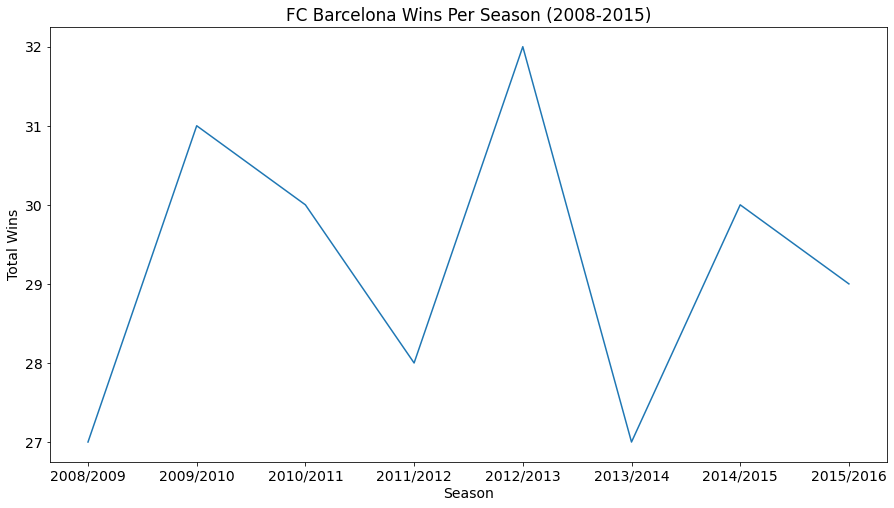

In [128]:
# sns.barplot( x='season', y='team_goal', data=barca_goals)
# sns.barplot( x='season', y='result', data=barca_wins);

plt.title('FC Barcelona Wins Per Season (2008-2015)')
plt.plot(barca_wins['season'], barca_wins['result'])
plt.xlabel('Season')
plt.ylabel('Total Wins')

Text(0, 0.5, 'Total Goals')

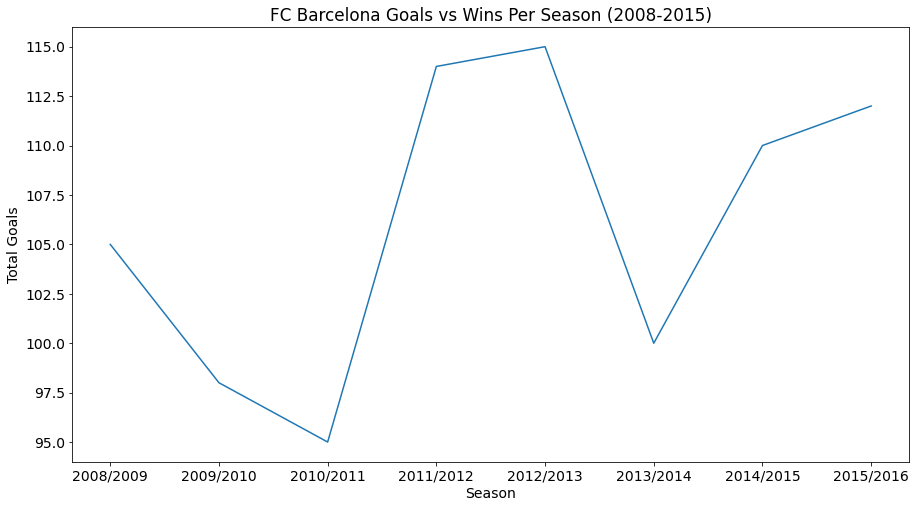

In [129]:
plt.title('FC Barcelona Goals vs Wins Per Season (2008-2015)')
plt.plot(barca_goals['season'], barca_goals['team_goal'])
plt.xlabel('Season')
plt.ylabel('Total Goals')

> From the 2 charts above, I can infer that throughout the time period, scoring more goals tended to winning more matches. I have allowed the y-axis to start from the scale of the minimum value instead of 0 so that we can see the changes better.

## 3. Do faster players have better finishing?

> I will be analyzing the relationship between player finishing and player sprint speed with a scatterplot .

In [130]:
df_player_ed.head()

,player_name,birthday,height,weight,date,overall_rating,preferred_foot,finishing,acceleration,sprint_speed,stamina
0,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2016-02-18 00:00:00,67.0,right,44.0,60.0,64.0,54.0
1,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-11-19 00:00:00,67.0,right,44.0,60.0,64.0,54.0
2,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-09-21 00:00:00,62.0,right,44.0,60.0,64.0,54.0
3,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2015-03-20 00:00:00,61.0,right,43.0,60.0,64.0,54.0
4,Aaron Appindangoye,1992-02-29 00:00:00,182,187,2007-02-22 00:00:00,61.0,right,43.0,60.0,64.0,54.0


In [131]:
player_stats = df_player_ed.groupby(['player_name']).mean()

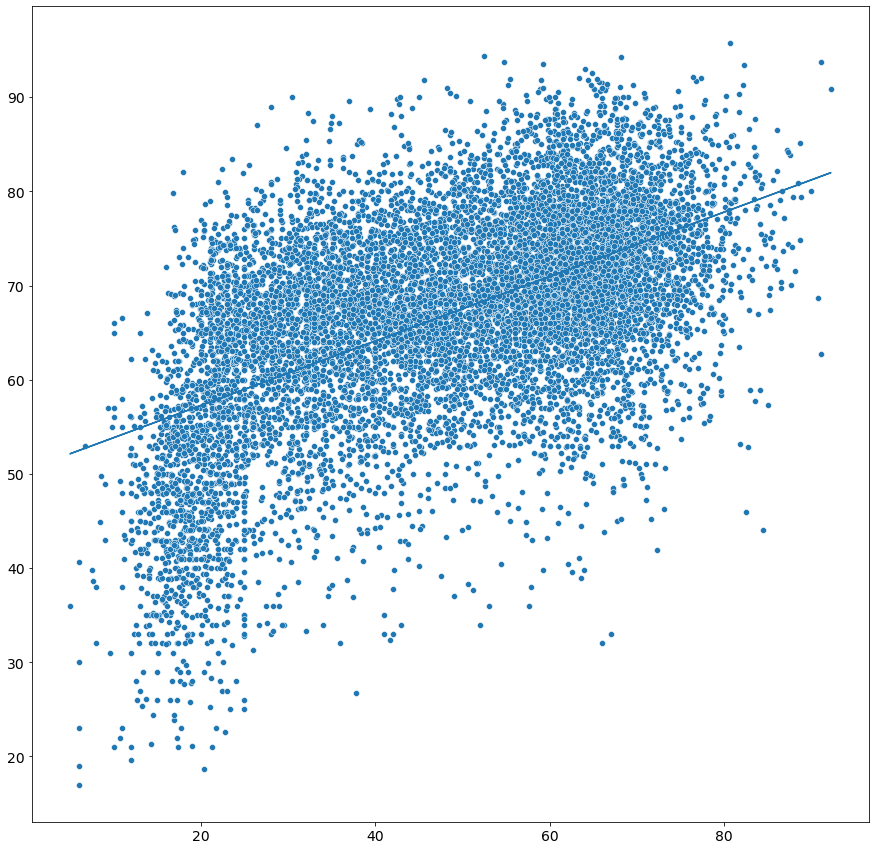

In [135]:
# creating list of variables to be measured
u = np.array(player_stats['finishing'])
v = np.array(player_stats['sprint_speed'])

# creating the scatterplot
sns.scatterplot(x=u, y=v)

w = np.polyfit(u, v, 1)
x = np.poly1d(w)

rcParams['font.size'] = 14
rcParams['figure.figsize'] = [15, 15]

#adding trendline to plot
plt.plot(u, x(u));

> From the scatterplot, there seems to be a correlation between player finishing and speed. It seems that fast players also tend to score more goals. Though the correlation is not very strong and there are many outliers.

<a id='conclusions'></a>
# **Conclusions**

---

> I have tried to analyze and answer some quesitons based on the dataset though there were some limitations. The dataset is not very well explained in the documentation and there are many columns in some of the tables which I do not know what they represent so I drop them and try to reduce the tables to something I can work with. 
> - I was able to discover that FC Barcelona and Real Madrid FC have the highest number of goals and wins in the time period of the dataset.
> - By analyzing Barcelona matches, I found that as they scored more goals, they tended to win more matches.
> - I also found a positive correlation (though not the strongest) between faster players and their finishing.
> 
> I was also planning to analyze the dataset with SQL commands which is why I created the database connection in the beginning, but I didn't have time to do that so I plan to work on that as soon as I can make time.
> There is still a lot to explore as I did not touch everything here but I will keep exploring the data.

# Sources
> I made refence to a lot of websites to learn and troubleshoot. Here are a few of them
1. https://www.statology.org/matplotlib-trendline/
2. https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html
3. https://www.section.io/engineering-education/seaborn-tutorial/#:~:text=Seaborn%20is%20an%20open%2Dsource,can%20also%20be%20customized%20easily.
4. https://seaborn.pydata.org/generated/seaborn.barplot.html
5. https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
6. https://cmdlinetips.com/2019/05/how-to-implement-pandas-groupby-operation-with-numpy/
7. https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/